In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/Algerian_forest_fires_cleaned_dataset_3.csv"

df = pd.read_csv(file_path)

print(df.head())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

No nulls, yay!
How would you deal with them though?

Sub with mean/median or drop rows!

Let's change our column on whether or not there was a fire to numeric binary values for the machine learning algorithms


In [5]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


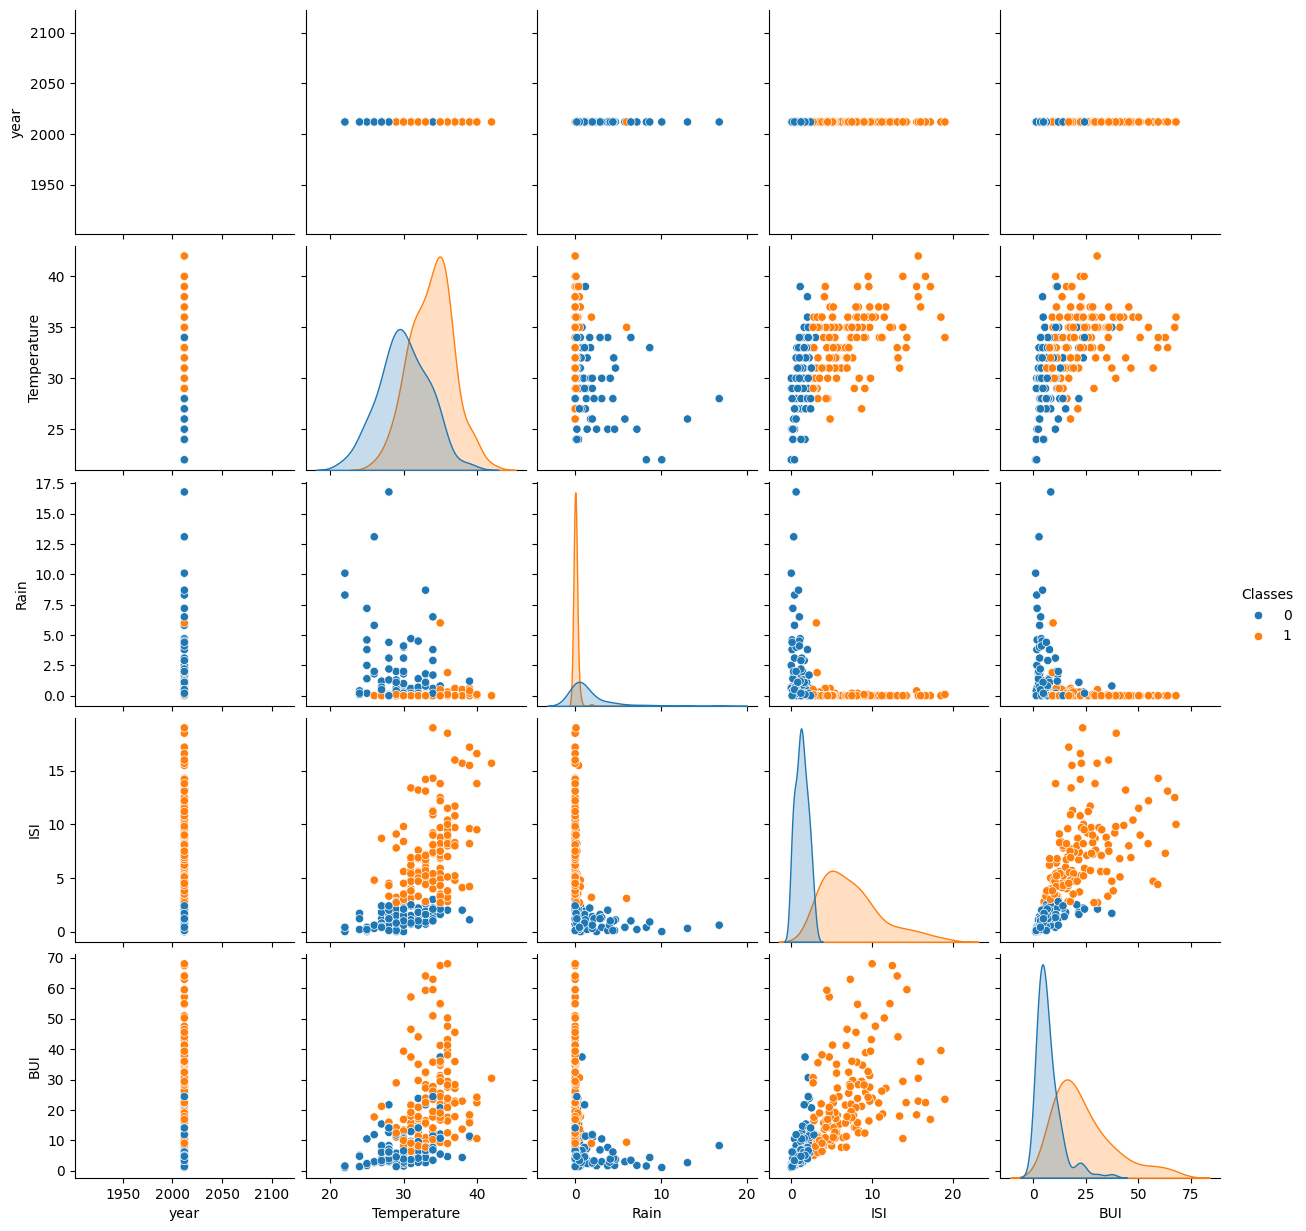

In [6]:
subset_df = df[['year', 'Temperature', 'Rain', 'ISI', 'BUI', "Classes"]]
sns.pairplot(subset_df, hue="Classes");
plt.show()
# change subsets to examine the relationships
# what findings do you get from the data?

([<matplotlib.patches.Wedge at 0x7b15fb209c90>,
 [Text(0.21895629591982635, 1.0779880057204114, 'Not Fire'),
  Text(-0.21895619499130464, -1.0779880262205745, 'Fire')],
 [Text(0.11943070686535981, 0.5879934576656789, '43.62%'),
  Text(-0.11943065181343888, -0.587993468847586, '56.38%')])

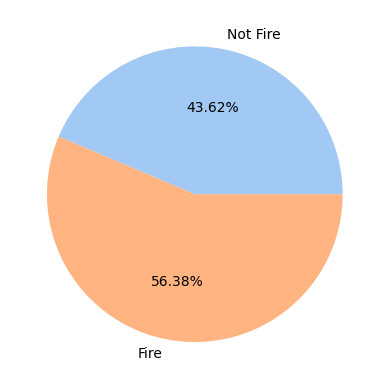

In [ ]:
palette_color = sns.color_palette('pastel')

not_fire=(df['Classes'] == 0).sum()
data = [not_fire, len(df)-not_fire]
label=["Not Fire", "Fire"]
plt.pie(data, labels=label, colors=palette_color, autopct='%.2f%%')

<Axes: >

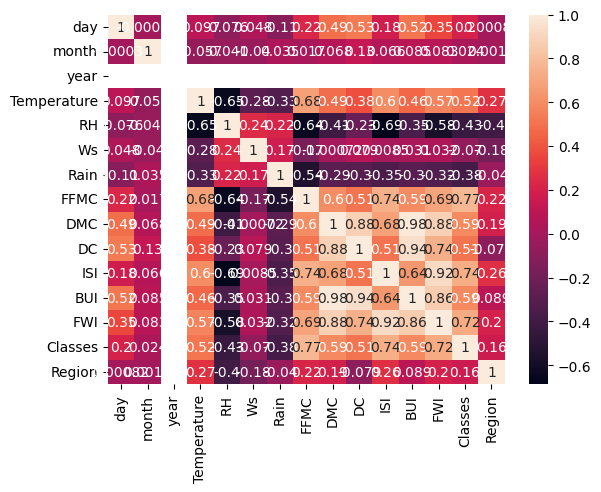

In [ ]:
sns.heatmap(df.corr(),annot=True)

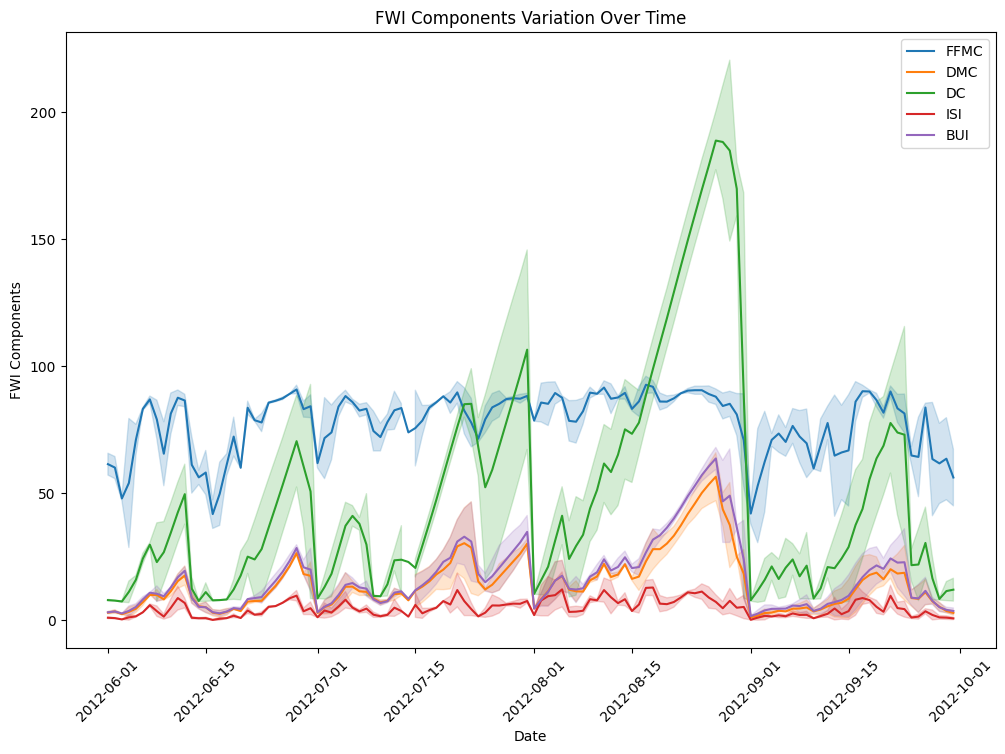

In [ ]:
df['Date'] = pd.to_datetime(df[['year', 'month', 'day']]) # Make date column

fwi_components = ['FFMC', 'DMC', 'DC', 'ISI', 'BUI']
plt.figure(figsize=(12, 8))
for component in fwi_components:
    sns.lineplot(x='Date', y=component, data=df, label=component)
plt.title('FWI Components Variation Over Time')
plt.xlabel('Date')
plt.ylabel('FWI Components')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Can look at year, month, and day separately too, how would you do that?